In [103]:
import matplotlib.pyplot as plt
% matplotlib inline

In [129]:
import numpy as np


class LinearRegression(object):
    """Multivariate linear regression model using gradient descent"""

    def __init__(self):
        pass

    def train(self, x, y, epochs=10, batch_size=32, learning_rate=0.0001):

        self.theta_array = np.zeros(np.array(x.ndim)+1)

        x = self._add_bias(x)
        
        self.loss = []
        self.theta = []
        
        for _ in range(1, epochs):
            loss = self._avg_minibatch_loss(x, self.theta_array, y)
            print('loss: ', loss)
            print("theta: {}".format(self.theta_array))
            self.loss.append(loss)
            self.theta.append(self.theta_array)

            avg_minibatch_partial_grads = np.average(
                                      (x.transpose().dot(self.theta_array) - y) * x, axis=1)
            print('avg minibatch_partial_grads: {}'.format(avg_minibatch_partial_grads))
            self.theta_array -= learning_rate * avg_minibatch_partial_grads

    def validate(self, x, y):
        self._check_theta_exists()

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        rmse = np.sqrt(np.average(np.square(y- predicted_y))) # Root Mean Square Error (RMSE)
        return predicted_y, rmse

    def predict(self, x):
        self._check_theta_exists()

        x = self._add_bias(x)

        predicted_y = np.dot(x.transpose(), self.theta_array)
        return predicted_y

    def _add_bias(self, x):
        if x.ndim == 1:
             x = np.row_stack((x, np.ones(len(x))))
        else:
             x = np.row_stack((x, np.ones(len(x[0]))))
        return x
    
    def _avg_minibatch_loss(self, x, theta_array, y):
        # RMSE
        avg_minibatch_loss = np.sqrt(
                 np.average(
                 np.square(
                 x.transpose().dot(theta_array) - y)))
        return avg_minibatch_loss
    
    def _check_theta_exists(self):
        assert hasattr(self, 'theta_array'), ("ValueError: theta is not defined. "
            "Please make sure to train the model before predicting.")


In [130]:
linear_regression = LinearRegression()

In [131]:
x = np.array(np.arange(100))
delta = np.random.uniform(-10,10, size=(100,))
y = (.4 * x +3 + delta)

In [132]:
linear_regression.train(x, y, epochs=10, learning_rate=0.01)

loss:  26.68598901658508
theta: [0. 0.]
avg minibatch_partial_grads: [-1489.29860487   -23.10681381]
loss:  827.626541202419
theta: [14.89298605  0.23106814]
avg minibatch_partial_grads: [47423.25895898   714.32706374]
loss:  26352.963590219628
theta: [-459.33960354   -6.9122025 ]
avg minibatch_partial_grads: [-1510073.04085559   -22767.32939159]
loss:  839143.2430169778
theta: [14641.39080501   220.76109142]
avg minibatch_partial_grads: [48084445.08368646   724946.49912584]
loss:  26720387.572961513
theta: [-466203.06003185   -7028.70389984]
avg minibatch_partial_grads: [-1.53112716e+09 -2.30841033e+07]
loss:  850842949.6504351
theta: [14845068.51753041   223812.32892306]
avg minibatch_partial_grads: [4.87548597e+10 7.35054681e+08]
loss:  27092935047.9341
theta: [-4.72703528e+08 -7.12673448e+06]
avg minibatch_partial_grads: [-1.55247481e+12 -2.34059514e+10]
loss:  862705778796.3658
theta: [1.50520446e+10 2.26932780e+08]
avg minibatch_partial_grads: [4.94346215e+13 7.45303139e+11]
loss

In [133]:
linear_regression.train(x, y, epochs=10, learning_rate=0.001)

loss:  26.68598901658508
theta: [0. 0.]
avg minibatch_partial_grads: [-1489.29860487   -23.10681381]
loss:  59.67661049307851
theta: [1.4892986  0.02310681]
avg minibatch_partial_grads: [3401.95715151   50.63657395]
loss:  135.74819668832163
theta: [-1.91265855 -0.02752976]
avg minibatch_partial_grads: [-7770.87566589  -117.81094163]
loss:  309.833093258814
theta: [5.85821712 0.09028118]
avg minibatch_partial_grads: [17750.62622466   266.96521478]
loss:  707.6259393082997
theta: [-11.89240911  -0.17668403]
avg minibatch_partial_grads: [-40546.76976215   -611.95774856]
loss:  1616.3441368393303
theta: [28.65436066  0.43527372]
avg minibatch_partial_grads: [92618.84066043  1395.71931241]
loss:  3692.1071750701244
theta: [-63.96448    -0.9604456]
avg minibatch_partial_grads: [-211564.21075405   -3190.30901959]
loss:  8433.672953960111
theta: [147.59973075   2.22986342]
avg minibatch_partial_grads: [483264.79555335   7285.30972176]
loss:  19264.582136827226
theta: [-335.6650648   -5.055446

In [134]:
linear_regression.train(x, y, epochs=10, learning_rate=0.0001)

loss:  26.68598901658508
theta: [0. 0.]
avg minibatch_partial_grads: [-1489.29860487   -23.10681381]
loss:  18.474187435901946
theta: [0.14892986 0.00231068]
avg minibatch_partial_grads: [-1000.17302923   -15.73247503]
loss:  13.192377561084497
theta: [0.24894716 0.00388393]
avg minibatch_partial_grads: [-671.68833933  -10.78004529]
loss:  9.929940511064684
theta: [0.316116   0.00496193]
avg minibatch_partial_grads: [-451.08611189   -7.45411001]
loss:  8.036256689515834
theta: [0.36122461 0.00570734]
avg minibatch_partial_grads: [-302.93508921   -5.22048834]
loss:  7.016898190104143
theta: [0.39151812 0.00622939]
avg minibatch_partial_grads: [-203.44051125   -3.7204376 ]
loss:  6.505091033912191
theta: [0.41186217 0.00660144]
avg minibatch_partial_grads: [-136.62240321   -2.71303503]
loss:  6.2605795020636625
theta: [0.42552441 0.00687274]
avg minibatch_partial_grads: [-91.7490076   -2.03648283]
loss:  6.147116095480969
theta: [0.43469931 0.00707639]
avg minibatch_partial_grads: [-61.6

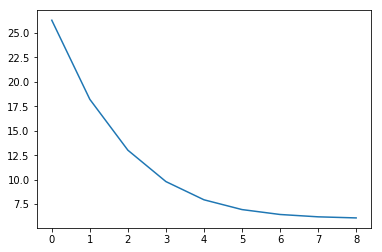

In [124]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.plot(linear_regression.loss)

plt.subplot(1, 2, 2)
plt.plot(x, y)

plt.show()

plt.plot(linear_regression.loss)

In [121]:
y_predicted = linear_regression.predict(x)

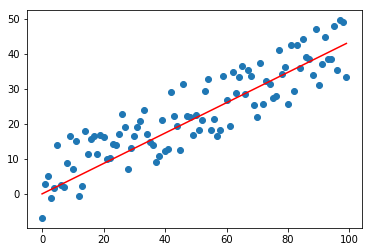

In [122]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(x, y)
plt.plot(x, y_predicted, color='red')
plt.show()